# Dataset



In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# X = 4 * np.random.rand(100,1)
# Y = 4 + 7* X +  + 6*X**2 + 7*np.random.randn(100,1)

# X = 4 * np.random.rand(100,1)  # X sampled in [0,4]
# Y = 4 + 7*X + 6*X**2 + 7*np.random.randn(100,1)

X = 10 * np.random.rand(100,1)
Y = 17 *np.sin(X) +  2*np.random.randn(100,1)

# Visualise Data Plot func



In [23]:
def PlotGraph(C1,E1,C2,E2,C3,E3):

  X_line = np.linspace(X.min(), X.max(), 100) # Creates 100 evenly spaced points

  # 4. Calculate the predicted Y-values (the regression line)
  Y_pred = (C1 *X_line**E1) + (C2 *X_line**E2) + (C3 * X_line ** E3)


  # Add titles and labels

  plt.figure(figsize=(10, 6))
  plt.scatter(X, Y)
  plt.plot(X_line, Y_pred, color='red', linewidth=2, label=f'Regression Line: ({C1} *X**{E1}) + ({C2} *X**{E2}) + ({C3} * X ** {E3}')

  plt.title('Years of Experience vs. Salary')
  plt.xlabel('YearsExperience')
  plt.ylabel('Salary')
  plt.grid(True)
  plt.show()

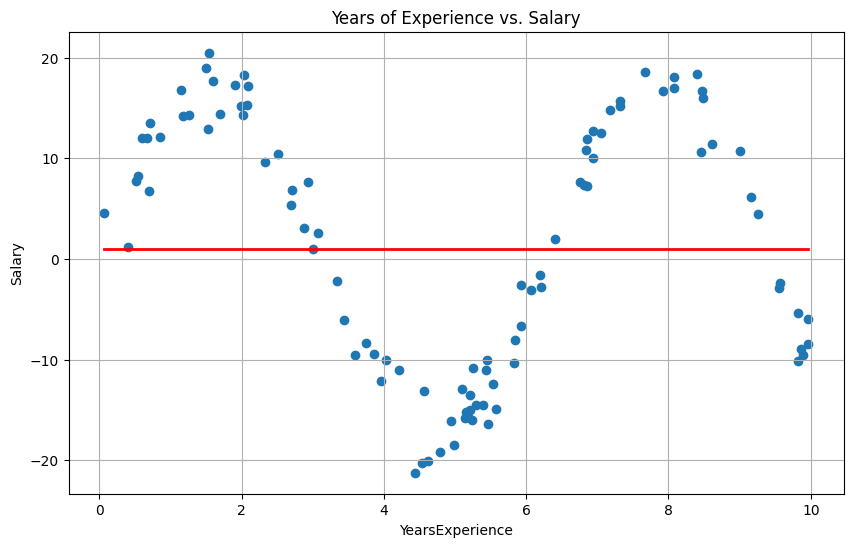

In [24]:
PlotGraph(1,0,0,1,0,1)

# Mean Squared Error Calculator

we're using the same data throughout, hence no need of DYNAMIC dynamic functions

In [25]:
def MSE(C1,E1,C2,E2,C3,E3):
  YStream = Y
  XStream = X
  Summation = 0
  for N in range(len(YStream)):

    ObservedValue = YStream[N]
    PredictedValue = (C1 *XStream[N].item()**E1) + (C2 *XStream[N].item()**E2) + (C3 * XStream[N].item() ** E3)

    Error = ObservedValue - PredictedValue
    ErrorSquared = Error ** 2

    Summation += ErrorSquared
    # print(f'Observed Value = {ObservedValue} --- Predicted Value = {PredictedValue} --- Error = {Error}')

  return (Summation / len(YStream)).item()


In [26]:
MSE(1,2,5,6,2,3)

2146569123833.6375

# Partial Derivatives
This is to look at the rate of change of the BiVariate MSE with respects to only 1 Parameter

In [27]:
def PartialDerivativeCN(CD,ED,Cn1,En1,Cn2,En2):
  YStream = Y
  XStream = X
  Summation = 0
  for N in range(len(YStream)):

    ObservedValue = YStream[N]
    PredictedValue = (CD *XStream[N].item()**ED) + (Cn1 *XStream[N].item()**En1) + (Cn2 * XStream[N].item() ** En2)

    Error = PredictedValue - ObservedValue

    ErrorXPartialDer = Error * XStream[N].item() ** ED

    Summation = Summation + ErrorXPartialDer
    # print(f'Observed Value = {ObservedValue} --- Predicted Value = {PredictedValue} --- Error = {Error}')

  return (2 * Summation / len(YStream)).item()

In [28]:
import math
def PartialDerivativeEN(CD,ED,Cn1,En1,Cn2,En2):
  YStream = Y
  XStream = X
  Summation = 0
  for N in range(len(YStream)):

    ObservedValue = YStream[N]
    PredictedValue = (CD *XStream[N].item()**ED) + (Cn1 *XStream[N].item()**En1) + (Cn2 * XStream[N].item() ** En2)

    Error = PredictedValue - ObservedValue
    if not XStream[N].item() <= 0:

      ErrorXPartialDer = Error * (CD * (XStream[N].item()**ED) * (math.log(XStream[N].item())))
    else:
      continue


    Summation = Summation + ErrorXPartialDer
    # print(f'Observed Value = {ObservedValue} --- Predicted Value = {PredictedValue} --- Error = {Error}')

  return (2 * Summation / len(YStream)).item()

# Gradient Descent Iteration Steps

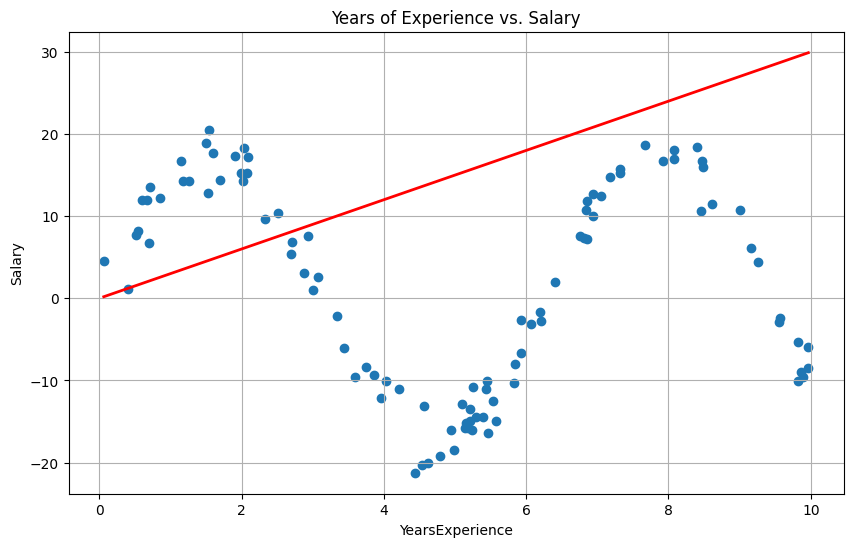

Final Parameters give an MSE Of 142.2808829802858, Parameters are  -11.498382279695738, 0.16200175815868162, 7.3919612743634096, -0.10636332821563424, 10.904764117117134, -0.10617113438758922


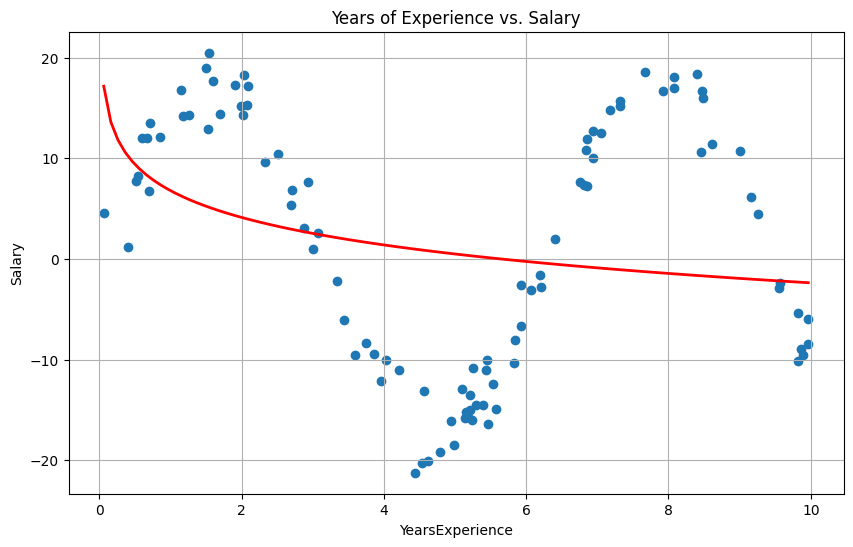

In [29]:
AlphaC = 0.01
AlphaE = 0.0001

Ca = 1
Ea = 1
Cb = 1
Eb = 1
Cc = 1
Ec = 1

PlotGraph(Ca,Ea,Cb,Eb,Cc,Ec)

MaxIterations = 20000

MSE_History = [MSE(Ca,Ea,Cb,Eb,Cc,Ec)]



for I in range(MaxIterations):

  # PRE COMPUTED PARTIAL DERIVATIVES - avoid mid iteration changes
  # dCa = PartialDerivativeCN(Ca,Ea, Cb,Eb,Cc,Ec)
  # dEa = PartialDerivativeEN(Ca,Ea, Cb,Eb,Cc,Ec)
  # dCb = PartialDerivativeCN(Cb,Eb, Ca,Ea,Cc,Ec)
  # dEb = PartialDerivativeEN(Cb,Eb, Ca,Ea,Cc,Ec)
  # dCc = PartialDerivativeCN(Cc,Ec, Ca,Ea,Cb,Eb)
  # dEc = PartialDerivativeEN(Cc,Ec, Ca,Ea,Cb,Eb)

  # Ca = Ca - (Alpha * dCa)
  # Ea = Ea - (Alpha * dEa)

  # Cb = Cb - (Alpha * dCb)
  # Eb = Eb - (Alpha * dEb)

  # Cc = Cc - (Alpha * dCc)
  # Ec = Ec - (Alpha * dEc)


  Ca = Ca - (AlphaC * PartialDerivativeCN(Ca,Ea, Cb,Eb,Cc,Ec))
  Ea = Ea - (AlphaE * PartialDerivativeEN(Ca,Ea, Cb,Eb,Cc,Ec))

  Cb = Cb - (AlphaC * PartialDerivativeCN(Cb,Eb, Ca,Ea,Cc,Ec))
  Eb = Eb - (AlphaE * PartialDerivativeEN(Cb,Eb, Ca,Ea,Cc,Ec))

  Cc = Cc - (AlphaC * PartialDerivativeCN(Cc,Ec, Ca,Ea,Cb,Eb))
  Ec = Ec - (AlphaE * PartialDerivativeEN(Cc,Ec, Ca,Ea,Cb,Eb))


  MSE_History.append(MSE(Ca,Ea,Cb,Eb,Cc,Ec))


print(f'Final Parameters give an MSE Of {MSE(Ca,Ea,Cb,Eb,Cc,Ec)}, Parameters are  {Ca}, {Ea}, {Cb}, {Eb}, {Cc}, {Ec}')

PlotGraph(Ca,Ea,Cb,Eb,Cc,Ec)

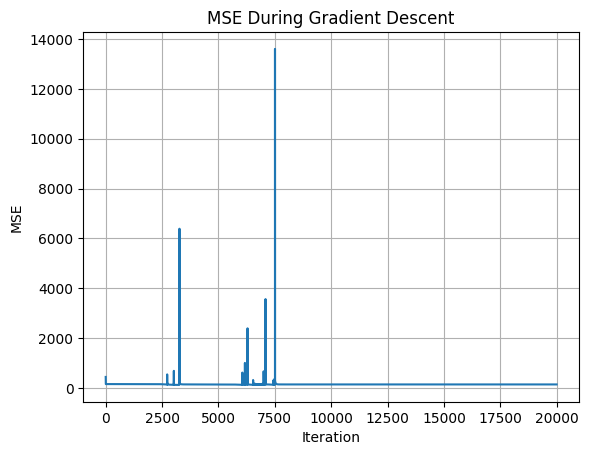

In [30]:

plt.plot(MSE_History)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("MSE During Gradient Descent")
plt.grid(True)
plt.show()